In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv("penguins.csv")
df = df.dropna()
#  the main statistics about the dataset
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Mounted at /content/drive
/
/content/drive/MyDrive


In [10]:
#  Convert features with string datatype to categorical (species, island, sex).

df = pd.get_dummies(df, columns = ['sex','island','species'])
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,0,1,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,2007,0,1,0,0,1,1,0,0


In [11]:
# Normalize non-categorical features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g). 

non_categ_features = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# evaluating the min and max values for each column.

min_values = non_categ_features.min()
max_values = non_categ_features.max()

data_norm  = (non_categ_features - min_values) / (max_values - min_values)

print(data_norm.describe())
df = df.drop(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], axis = 1)
df = pd.concat((df,data_norm), axis = 1) 



       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean         0.432465       0.483912           0.490966     0.418627
std          0.198861       0.234433           0.237555     0.223671
min          0.000000       0.000000           0.000000     0.000000
25%          0.269091       0.297619           0.305085     0.236111
50%          0.450909       0.500000           0.423729     0.375000
75%          0.600000       0.666667           0.694915     0.576389
max          1.000000       1.000000           1.000000     1.000000


In [12]:
# Shuffling the dataframe and reseting the index.

df = df.sample(frac=1).reset_index(drop=True)

# Splitting the data into test and train sets. 

split_data = int(len(df) * 0.8)

X = df.drop(['island_Torgersen','year'], axis = 1)
y = df['island_Torgersen']

print(split_data)

X_train = X[:split_data]
X_test = X[split_data:]
y_train = y[:split_data]
y_test = y[split_data:]

np.shape(X_train)
X_train.head()

266


,sex_female,sex_male,island_Biscoe,island_Dream,species_Adelie,species_Chinstrap,species_Gentoo,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,1,1,0,1,0,0,0.385455,0.619048,0.406780,0.381944
1,1,0,1,0,0,0,1,0.549091,0.285714,0.728814,0.631944
2,1,0,0,1,1,0,0,0.160000,0.583333,0.169492,0.125000
3,1,0,0,0,1,0,0,0.320000,0.440476,0.322034,0.277778
4,1,0,1,0,0,0,1,0.523636,0.166667,0.694915,0.472222


Accuracy: 0.9253731343283582


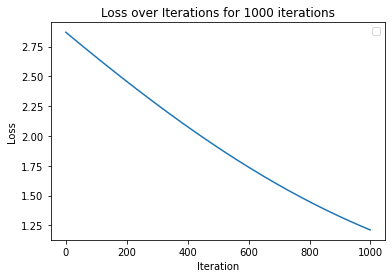

In [65]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
# Defining linear regression model by calling LogitRegression class 
class LogitRegression:  
    
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
       
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, Y):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        J = -np.mean(Y*np.log(h) + (1-Y)*np.log(1-h))
        return J
    
    def gradient_descent(self, X, Y):
      # Definining current prediction
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
#         print(type(Y))
#         print(type(X))
        delta = h - Y
        del_Wt = np.dot(X.T, delta) / len(X)
        del_Bs = np.mean(delta)
        return del_Wt,del_Bs
    
    def fit(self, X_train, Y_train):
      # intializing weights
        self.weights = np.random.rand(X_train.shape[1])
        self.bias = 0

        self.loss = []

      # performing gradient descent
        for d in range(self.iterations):
            
            del_Wt, del_Bs = self.gradient_descent(X_train, Y_train)

            self.weights -= self.learning_rate * del_Wt
            self.bias -= self.learning_rate * del_Bs
            # Calling cost function and keeping it in an array
            J = self.cost(X_train,Y_train)
            self.loss.append(J)
           # print( self.loss)
            
    def predict(self, X):
      # adding bias to the data set
        z = np.dot(X, self.weights) + self.bias
        #  returning prediction 
        y_pred = self.sigmoid(z)
        y_pred = y_pred <= 0.5 
        y_pred = y_pred.astype(int)
        
        return y_pred
 # creating a model by calling LogitRegression class and passing hyperparameters
  
model = LogitRegression(learning_rate=1e-3, iterations=1000)
# performs the training on traning data
model.fit(X_train, y_train)
# predicted result
y_pred = model.predict(X_test)
# Model accuracy
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)
model.weights

plt.plot(model.loss)
plt.legend()
plt.title(f'Loss over Iterations for {1000} iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
import pickle
# Saving the weights of the model
pickle.dump(model.weights, open( "nkumar27_saritaku_ assignment1_ part_1.pickle", "wb" ) )
model.weights = pickle.load( open( "nkumar27_saritaku_ assignment1_ part_1.pickle", "rb" ) )

# Part II: Linear Regression

In [ ]:
df = pd.read_csv("diamond.csv")
df = df.dropna()
#  the main statistics about the dataset
print(df.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df = df.drop(df.columns[0], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df = pd.get_dummies(df, columns = ['color','cut','clarity'])
df.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Normalize non-categorical features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g). 

non_categ_features = df[['carat', 'depth','price','table','x','y','z']]

# evaluating the min and max values for each column.

min_values = non_categ_features.min()
max_values = non_categ_features.max()

data_norm  = (non_categ_features - min_values) / (max_values - min_values)

# print(data_norm.describe())
df = df.drop(['carat', 'depth','price','table','x','y','z'], axis = 1)
df = pd.concat((df,data_norm), axis = 1) 

df.head()

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,price,table,x,y,z
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0.006237,0.513889,0.000000,0.230769,0.367784,0.067572,0.076415
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.002079,0.466667,0.000000,0.346154,0.362197,0.065195,0.072642
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0.006237,0.386111,0.000054,0.423077,0.377095,0.069100,0.072642
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0.018711,0.538889,0.000433,0.288462,0.391061,0.071817,0.082704
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0.022869,0.563889,0.000487,0.288462,0.404097,0.073854,0.086478


In [ ]:
# Shuffling the dataframe and reseting the index.

df = df.sample(frac=1).reset_index(drop=True)

# Splitting the data into test and train sets. 

split_data = int(len(df) * 0.8)

X = df.drop(['price'], axis = 1)
y = df['price']

print(split_data)

X_train = X[:split_data]
X_test = X[split_data:]
y_train = y[:split_data]
y_test = y[split_data:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

43152
(43152, 26)
(10788, 26)
(43152,)
(10788,)


,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0.029106,0.511111,0.288462,0.415270,0.076401,0.086478
1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0.014553,0.541667,0.250000,0.386406,0.070968,0.081761
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.313929,0.497222,0.288462,0.718808,0.130390,0.147484
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0.066528,0.522222,0.230769,0.481378,0.088115,0.100629
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.145530,0.566667,0.192308,0.567970,0.104754,0.122327


In [ ]:
weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [ ]:
print(weights)

0     7.845667e+11
1     7.845667e+11
2     7.845667e+11
3     7.845667e+11
4     7.845667e+11
5     7.845667e+11
6     7.845667e+11
7    -7.845667e+11
8    -7.845667e+11
9    -7.845667e+11
10   -7.845667e+11
11   -7.845667e+11
12    9.192922e+01
13    9.237628e+01
14    9.215904e+01
15    9.198330e+01
16    9.217142e+01
17    9.223496e+01
18    9.244605e+01
19    9.222203e+01
20    2.957218e+00
21   -1.141193e-01
22   -7.056571e-02
23   -5.788727e-01
24    1.830892e-02
25   -2.433539e-01
dtype: float64


In [ ]:
predictions = X_test.values @ weights.values
predictions = pd.Series(predictions)
print(predictions)

0       -0.070490
1        0.529064
2        0.633503
3       -0.072494
4       -0.096655
           ...   
10783   -0.496409
10784    0.483968
10785    0.265375
10786   -0.232307
10787    0.916711
Length: 10788, dtype: float64


In [ ]:
y_test = y_test.reset_index(drop = True)
mse = np.mean((predictions - y_test)**2)
print(mse)

0.0911811899476408


In [ ]:
import matplotlib.pyplot as plt

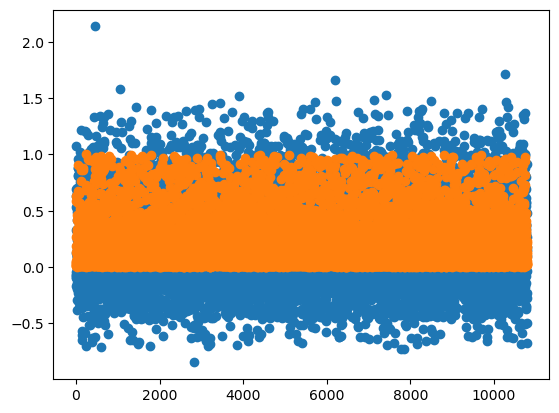

In [ ]:
plt.plot(predictions.index, predictions, 'o')
plt.plot(predictions.index, y_test, 'o')
plt.show()

In [ ]:
l = 0.5
ridge_weights = np.linalg.inv(X_train.T @ X_train + l * np.eye(X_train.shape[1])) @ X_train.T @ y_train

In [ ]:
print(ridge_weights)

0     0.095510
1     0.083949
2     0.080451
3     0.068988
4     0.042508
5     0.016899
6    -0.031320
7     0.038553
8     0.071276
9     0.085968
10    0.081319
11    0.079871
12   -0.161853
13    0.126795
14    0.036471
15   -0.015319
16    0.086816
17    0.069095
18    0.109789
19    0.105193
20    2.860278
21   -0.103118
22   -0.065834
23   -0.500947
24   -0.015768
25   -0.155884
dtype: float64


In [ ]:
predictions = X_test.values @ ridge_weights.values
predictions = pd.Series(predictions)
print(predictions)

0        0.036137
1       -0.024265
2        0.554663
3        0.157692
4        0.052644
           ...   
10783    0.121357
10784    0.200346
10785    0.102081
10786   -0.004796
10787    0.229161
Length: 10788, dtype: float64


In [ ]:
mse = np.mean((predictions - y_test)**2)
print(mse)

0.003860608187033524


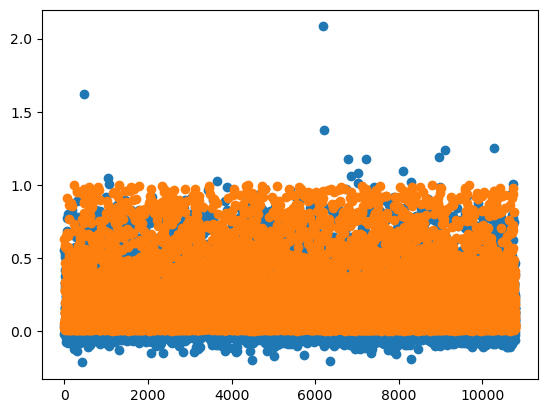

In [ ]:
plt.plot(predictions.index, predictions, 'o')
plt.plot(predictions.index, y_test, 'o')
plt.show()